In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [ ]:
# teste planilha 1
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# pega as primeiras linhas do arquivo juntado
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# pegas as ultimas linhas do arquivo juntado
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
# pega linhas aleatoriamente
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
230,Natal,2019-01-03,184.69,1036,1
93,Salvador,2019-01-01,15.58,1037,1
60,Natal,2018-05-02,534.00,852,3
112,Salvador,2019-03-02,43.00,1036,3
10,Aracaju,2019-01-01,42.34,1522,6


In [ ]:
# verificando o tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado da coluna LojaID
# mudando de int64 para ojbect
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
# mostrando alteração da LojaID
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Tratando valores faltantes

In [ ]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Subistituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Subistituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
# Apgando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace =True)

In [ ]:
# Removendo linhas que estejam com valores faltantes em toda as colunas
df.dropna(how="all", inplace=True)

Criando colunas novas

In [ ]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest -> Retorna as tres linhas com maior Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsamllest -> Retorna as tres linhas com menor receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [41]:
# Verificando o tipo de dao de cada coluna
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [43]:
# Transformandocoluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [45]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [46]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [47]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
36,Salvador,2019-01-01,9.67,1037,1,9.67,1.0,2019
90,Recife,2019-01-01,16.04,980,1,16.04,1.0,2019
200,Natal,2019-01-02,41.06,1035,1,41.06,1.0,2019
72,Salvador,2019-01-01,149.47,1036,3,448.41,3.0,2019
65,Natal,2019-04-05,292.00,852,2,584.00,2.0,2019


In [51]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
95,Salvador,2019-01-01,5.13,1035,1,5.13,1.0,2019,1,1
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,1.0,2019,2,11
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018,1,1
25,Aracaju,2018-01-01,34.66,1521,8,277.28,8.0,2018,1,1
51,Aracaju,2018-01-01,40.58,1522,6,243.48,6.0,2018,1,1


In [53]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [56]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [57]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
130,Natal,2019-01-02,59.78,1036,1,59.78,1.0,2019,1,2,366 days
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2,425 days
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019,1,1,365 days
33,Natal,2018-01-11,759.00,854,2,1518.00,2.0,2018,1,11,10 days


In [59]:
# Criando a coluna de trimestre
df["trimestre_venda"]= df["Data"].dt.quarter

In [60]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
30,Recife,2019-01-01,12.35,980,5,61.75,5.0,2019,1,1,365 days,1
40,Salvador,2019-02-13,161.87,1036,3,485.61,3.0,2019,2,13,408 days,1
13,Aracaju,2018-01-01,43.45,1522,10,434.50,10.0,2018,1,1,0 days,1
160,Salvador,2019-01-02,11.76,1034,1,11.76,1.0,2019,1,2,366 days,1
39,Recife,2019-01-01,143.58,981,3,430.74,3.0,2019,1,1,365 days,1


In [62]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [63]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

In [64]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

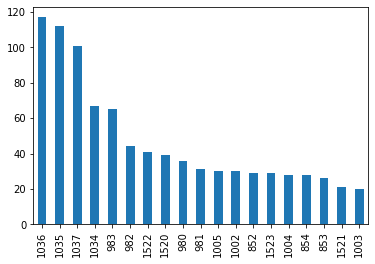

In [65]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

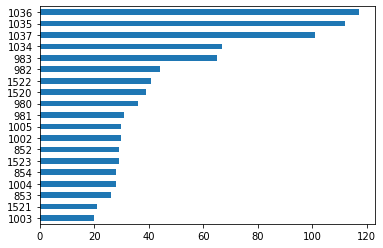

In [67]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

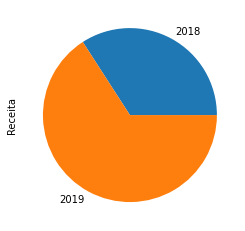

In [68]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [69]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

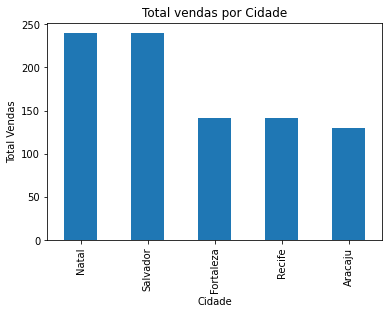

In [70]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

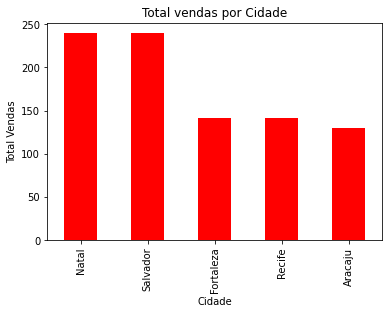

In [71]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [72]:
# Alterando o estilo
plt.style.use("ggplot")

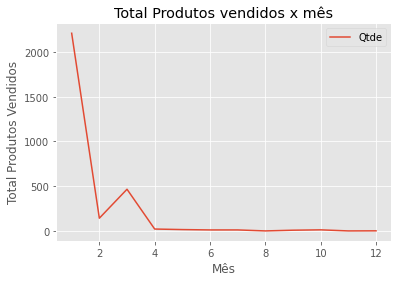

In [76]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [78]:
df_2019 = df[df["Ano_Venda"] == 2019]

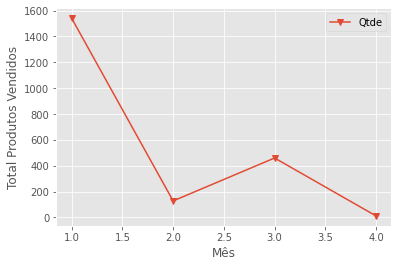

In [80]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

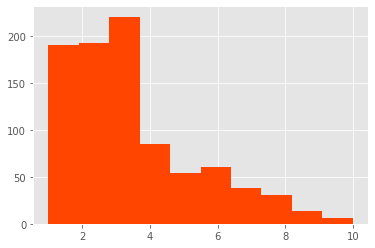

In [82]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

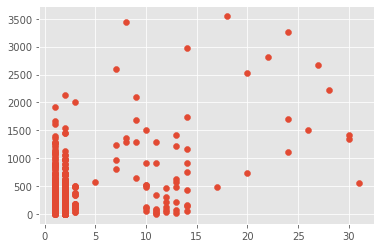

In [85]:
# grafico de dispersao
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

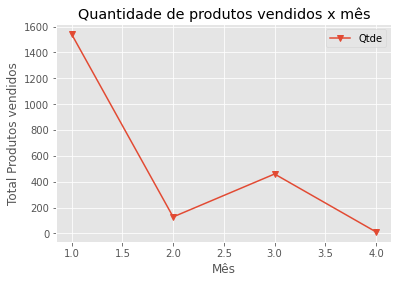

In [89]:
# Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")